In [36]:
# Import Libraries

from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
import string

from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

import nltk
nltk.downloader.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/kelumrubasin/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [37]:
# Authentication
consumerKey = "L45cVwt1PcimfFnycMhQEHRsg"
consumerSecret = "a2f3dr6xHHukbCzlvzK5j0mDYg3di3aN8EfixXOhzV9dbhMk1F"
accessToken = "1533339797187883008-A5uEjCSsKsH4OBeTaO8g0vHaqoI8h6"
accessTokenSecret = "UKvwBMeTRN6p4f2ogcrQAQT52Fi6eWUhe2pCnEkaJ8UGq"

auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

In [38]:
#Sentiment Analysis

def percentage(part,whole):
    return 100 * float(part)/float(whole) 

number_of_tweets = 200
twitter_username = "BlueOceanSL"
display_name = "Blue Ocean"

tweets = tweepy.Cursor(api.user_timeline, screen_name = twitter_username, tweet_mode = "extended").items(number_of_tweets)
positive  = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []

for tweet in tweets:
    
    #print(tweet.text)
    tweet_list.append(tweet.full_text)
    analysis = TextBlob(tweet.full_text)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet.full_text)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity
    
    if neg > pos:
        negative_list.append(tweet.full_text)
        negative += 1

    elif pos > neg:
        positive_list.append(tweet.full_text)
        positive += 1
    
    elif pos == neg:
        neutral_list.append(tweet.full_text)
        neutral += 1

positive = percentage(positive, number_of_tweets)
negative = percentage(negative, number_of_tweets)
neutral = percentage(neutral, number_of_tweets)
polarity = percentage(polarity, number_of_tweets)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

In [39]:
#Number of Tweets (Total, Positive, Negative, Neutral)
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))

total number:  200
positive number:  74
negative number:  8
neutral number:  118


In [40]:
tweet_list

,0
0,The development organization intends to increa...
1,Our engineers and other staff are in the last ...
2,Great things happen when Blue Ocean gets invol...
3,Quote of the day 💎\n\nhttps://t.co/yzBWhhLYm7 ...
4,The Pioneer Institute specialized in conductin...
...,...
195,Blue Ocean at Layard’s Road Project. Call Us F...
196,Take A Look at Our Interior Overviews. Call Us...
197,https://t.co/67aQc6GdoN
198,I added a video to a @YouTube playlist https:/...


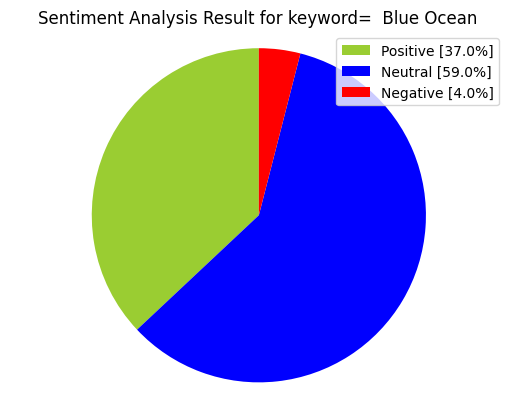

In [41]:
#Creating PieCart

labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for keyword=  "+display_name+"" )
plt.axis('equal')
plt.show()

In [42]:
tweet_list.drop_duplicates(inplace = True)

In [43]:
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]
tw_list

,0,text
0,The development organization intends to increa...,The development organization intends to increa...
1,Our engineers and other staff are in the last ...,Our engineers and other staff are in the last ...
2,Great things happen when Blue Ocean gets invol...,Great things happen when Blue Ocean gets invol...
3,Quote of the day 💎\n\nhttps://t.co/yzBWhhLYm7 ...,Quote of the day 💎\n\nhttps://t.co/yzBWhhLYm7 ...
4,The Pioneer Institute specialized in conductin...,The Pioneer Institute specialized in conductin...
...,...,...
195,Blue Ocean at Layard’s Road Project. Call Us F...,Blue Ocean at Layard’s Road Project. Call Us F...
196,Take A Look at Our Interior Overviews. Call Us...,Take A Look at Our Interior Overviews. Call Us...
197,https://t.co/67aQc6GdoN,https://t.co/67aQc6GdoN
198,I added a video to a @YouTube playlist https:/...,I added a video to a @YouTube playlist https:/...


In [44]:
tweet_list

,0,text
0,The development organization intends to increa...,The development organization intends to increa...
1,Our engineers and other staff are in the last ...,Our engineers and other staff are in the last ...
2,Great things happen when Blue Ocean gets invol...,Great things happen when Blue Ocean gets invol...
3,Quote of the day 💎\n\nhttps://t.co/yzBWhhLYm7 ...,Quote of the day 💎\n\nhttps://t.co/yzBWhhLYm7 ...
4,The Pioneer Institute specialized in conductin...,The Pioneer Institute specialized in conductin...
...,...,...
195,Blue Ocean at Layard’s Road Project. Call Us F...,Blue Ocean at Layard’s Road Project. Call Us F...
196,Take A Look at Our Interior Overviews. Call Us...,Take A Look at Our Interior Overviews. Call Us...
197,https://t.co/67aQc6GdoN,https://t.co/67aQc6GdoN
198,I added a video to a @YouTube playlist https:/...,I added a video to a @YouTube playlist https:/...


In [45]:
#Cleaning Text (RT, Punctuation etc)

#Creating new dataframe and new features
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]

#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: '," ",x)
rt = lambda x: re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x)
tw_list["text"] = tw_list.text.map(remove_rt).map(rt)
tw_list["text"] = tw_list.text.str.lower()
tw_list.head(10)

,0,text
0,The development organization intends to increa...,the development organization intends to increa...
1,Our engineers and other staff are in the last ...,our engineers and other staff are in the last ...
2,Great things happen when Blue Ocean gets invol...,great things happen when blue ocean gets invol...
3,Quote of the day 💎\n\nhttps://t.co/yzBWhhLYm7 ...,quote of the day realestatequote publi...
4,The Pioneer Institute specialized in conductin...,the pioneer institute specialized in conductin...
5,"Money can’t buy happiness. Habibi, come to Dub...",money can t buy happiness habibi come to dub...
6,The real place where you can find quality in e...,the real place where you can find quality in e...
7,Quote of the day 💎\nhttps://t.co/yzBWhhLYm7 \n...,quote of the day realestatequote public...
8,The picturesque property of Blue Ocean provide...,the picturesque property of blue ocean provide...
9,Blue Ocean offers you the Proper Significance ...,blue ocean offers you the proper significance ...


In [46]:
#Calculating Negative, Positive, Neutral and Compound values

tw_list[['polarity', 'subjectivity']] = tw_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tw_list['text'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        tw_list.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
        tw_list.loc[index, 'sentiment'] = "positive"
    else:
        tw_list.loc[index, 'sentiment'] = "neutral"
    tw_list.loc[index, 'neg'] = neg
    tw_list.loc[index, 'neu'] = neu
    tw_list.loc[index, 'pos'] = pos
    tw_list.loc[index, 'compound'] = comp

tw_list.head(10)

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,The development organization intends to increa...,the development organization intends to increa...,0.045455,0.443182,positive,0.000,0.728,0.272,0.7269
1,Our engineers and other staff are in the last ...,our engineers and other staff are in the last ...,-0.041667,0.313889,negative,0.052,0.948,0.000,-0.2960
2,Great things happen when Blue Ocean gets invol...,great things happen when blue ocean gets invol...,0.420000,0.510000,positive,0.000,0.824,0.176,0.8360
3,Quote of the day 💎\n\nhttps://t.co/yzBWhhLYm7 ...,quote of the day realestatequote publi...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
4,The Pioneer Institute specialized in conductin...,the pioneer institute specialized in conductin...,0.054167,0.366667,neutral,0.000,1.000,0.000,0.0000
5,"Money can’t buy happiness. Habibi, come to Dub...",money can t buy happiness habibi come to dub...,0.700000,0.200000,positive,0.000,0.865,0.135,0.5719
6,The real place where you can find quality in e...,the real place where you can find quality in e...,0.257143,0.357143,positive,0.000,0.855,0.145,0.7425
7,Quote of the day 💎\nhttps://t.co/yzBWhhLYm7 \n...,quote of the day realestatequote public...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
8,The picturesque property of Blue Ocean provide...,the picturesque property of blue ocean provide...,0.138889,0.200000,positive,0.000,0.933,0.067,0.3818
9,Blue Ocean offers you the Proper Significance ...,blue ocean offers you the proper significance ...,0.128571,0.357143,negative,0.049,0.905,0.046,-0.0258


In [47]:
#Creating new data frames for all sentiments (positive, negative and neutral)

tw_list_negative = tw_list[tw_list["sentiment"]=="negative"]
tw_list_positive = tw_list[tw_list["sentiment"]=="positive"]
tw_list_neutral = tw_list[tw_list["sentiment"]=="neutral"]

In [48]:
#Function for count_values_in single columns

def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

In [49]:
#Count_values for sentiment
count_values_in_column(tw_list,"sentiment")

,Total,Percentage
neutral,101,51.53
positive,72,36.73
negative,23,11.73


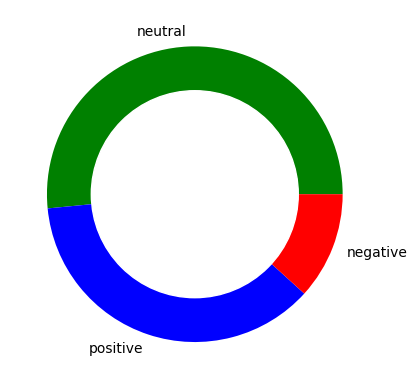

In [50]:
# create data for Pie Chart
pichart = count_values_in_column(tw_list,"sentiment")
names= pichart.index
size=pichart["Percentage"]
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['green','blue','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [51]:
#Function to Create Wordcloud

def create_wordcloud(text):
    mask = np.array(Image.open("cloud.png"))
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white",
                  mask = mask,
                  max_words=3000,
                  stopwords=stopwords,
                  repeat=True)
    wc.generate(str(text))
    wc.to_file("wc.png")
    print("Word Cloud Saved Successfully")
    path="wc.png"
    display(Image.open(path))

    

Word Cloud Saved Successfully


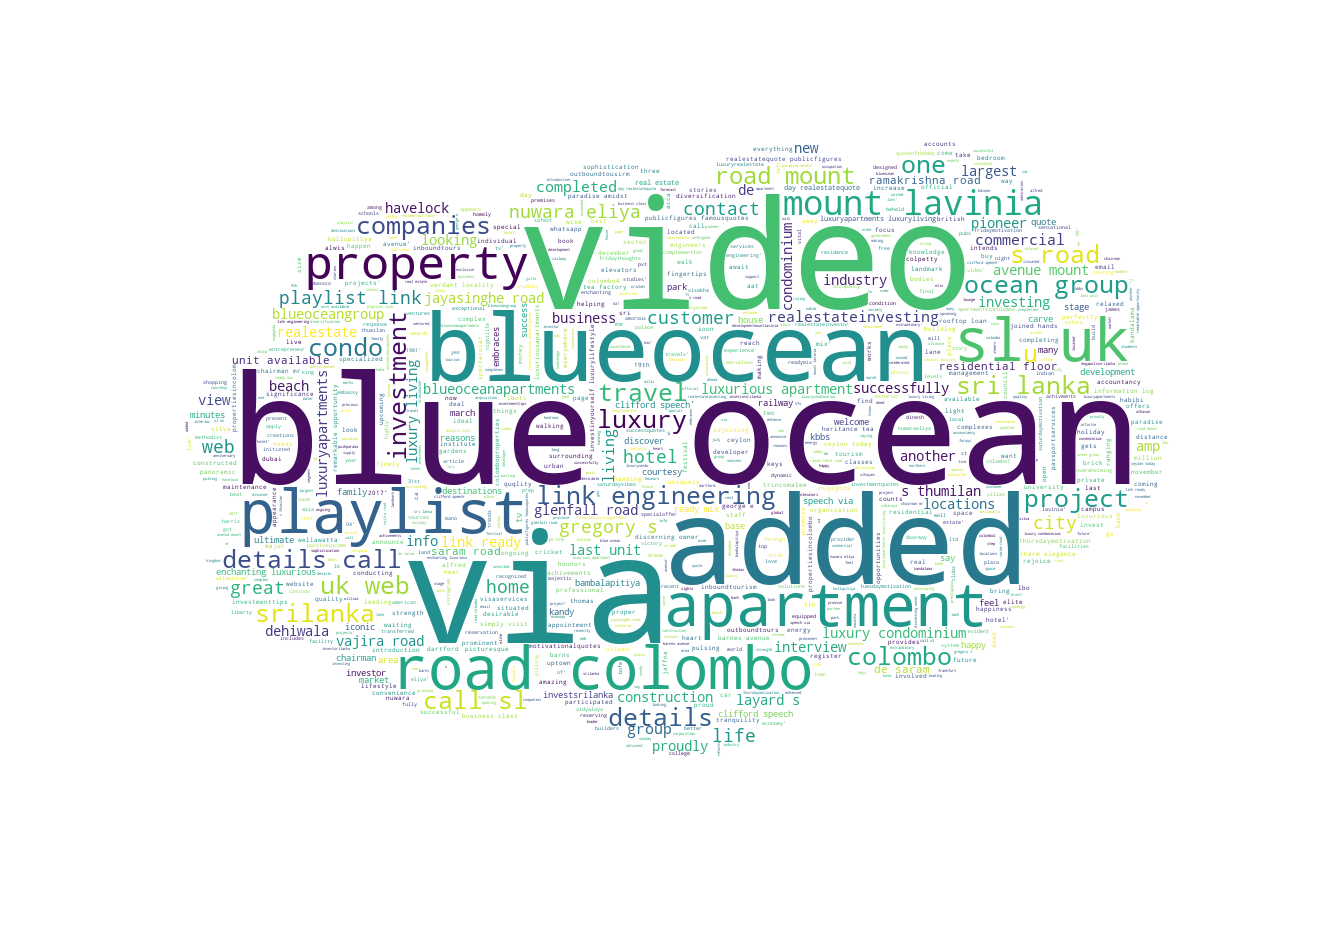

In [52]:
#Creating wordcloud for all tweets
create_wordcloud(tw_list["text"].values)

Word Cloud Saved Successfully


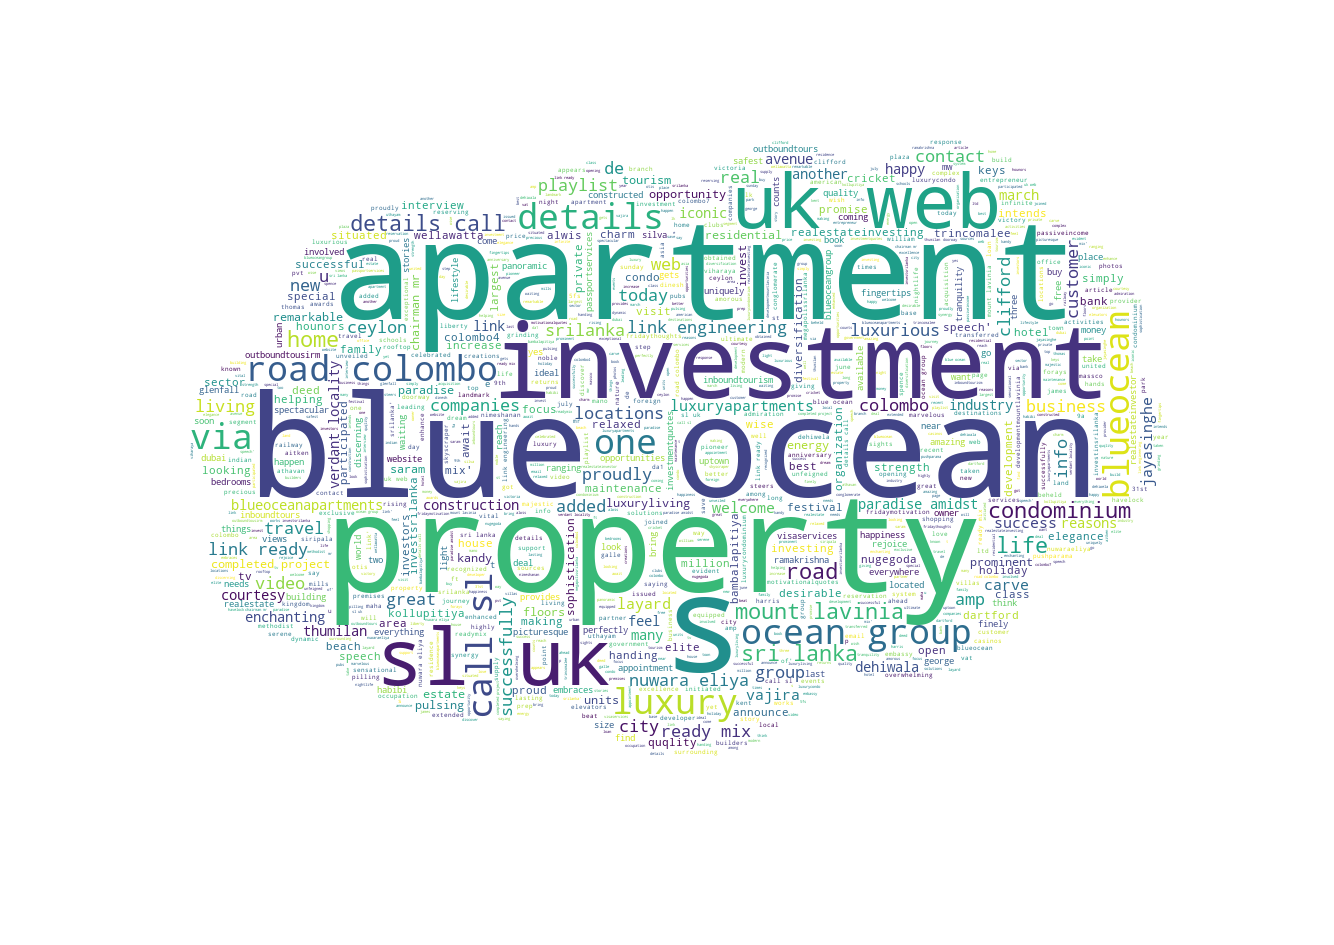

In [53]:
#Creating wordcloud for positive sentiment
create_wordcloud(tw_list_positive["text"].values)

Word Cloud Saved Successfully


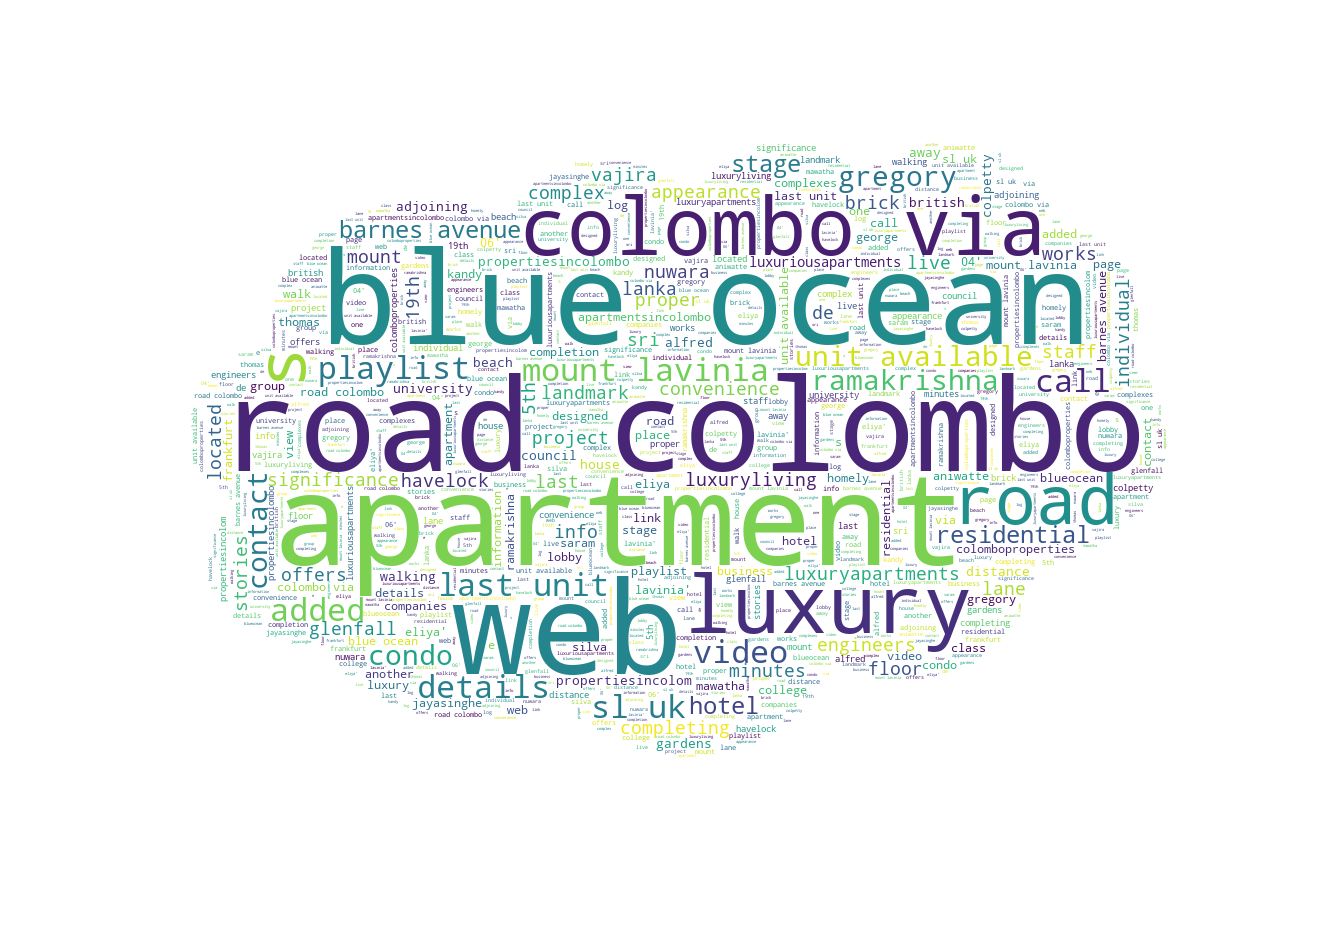

In [54]:
#Creating wordcloud for negative sentiment
create_wordcloud(tw_list_negative["text"].values)

Word Cloud Saved Successfully


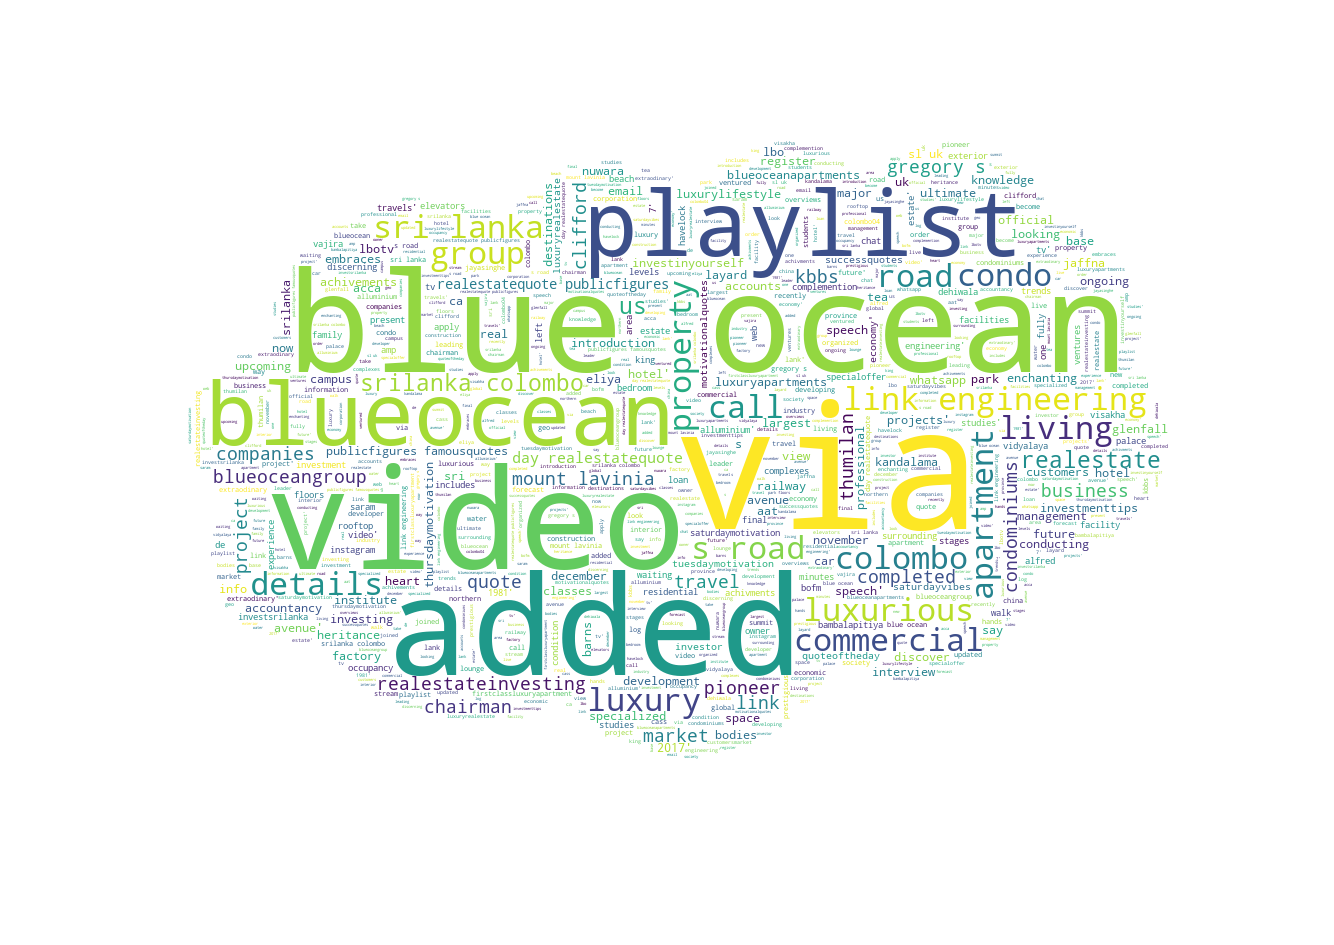

In [55]:
#Creating wordcloud for neutral sentiment
create_wordcloud(tw_list_neutral["text"].values)

In [56]:
#Calculating tweet's lenght and word count
tw_list['text_len'] = tw_list['text'].astype(str).apply(len)
tw_list['text_word_count'] = tw_list['text'].apply(lambda x: len(str(x).split()))

In [57]:
round(pd.DataFrame(tw_list.groupby("sentiment").text_len.mean()),2)

,text_len
sentiment,
negative,129.09
neutral,66.00
positive,157.22


In [58]:
round(pd.DataFrame(tw_list.groupby("sentiment").text_word_count.mean()),2)

,text_word_count
sentiment,
negative,22.26
neutral,9.45
positive,24.97


In [59]:
#Removing Punctuation
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

tw_list['punct'] = tw_list['text'].apply(lambda x: remove_punct(x))

In [60]:
#Appliyng tokenization
def tokenization(text):
    text = re.split('\W+', text)
    return text

tw_list['tokenized'] = tw_list['punct'].apply(lambda x: tokenization(x.lower()))

In [61]:
#Removing stopwords
stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
tw_list['nonstop'] = tw_list['tokenized'].apply(lambda x: remove_stopwords(x))

In [62]:
#Appliyng Stemmer
ps = nltk.PorterStemmer()

def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

tw_list['stemmed'] = tw_list['nonstop'].apply(lambda x: stemming(x))


In [63]:
#Cleaning Text
def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) # remove puntuation
    text_rc = re.sub('[0-9]+', '', text_lc)
    tokens = re.split('\W+', text_rc)    # tokenization
    text = [ps.stem(word) for word in tokens if word not in stopword]  # remove stopwords and stemming
    return text

In [64]:
tw_list.head()

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound,text_len,text_word_count,punct,tokenized,nonstop,stemmed
0,The development organization intends to increa...,the development organization intends to increa...,0.045455,0.443182,positive,0.000,0.728,0.272,0.7269,150,23,the development organization intends to increa...,"[the, development, organization, intends, to, ...","[development, organization, intends, increase,...","[develop, organ, intend, increas, invest, sri,..."
1,Our engineers and other staff are in the last ...,our engineers and other staff are in the last ...,-0.041667,0.313889,negative,0.052,0.948,0.000,-0.2960,256,41,our engineers and other staff are in the last ...,"[our, engineers, and, other, staff, are, in, t...","[engineers, staff, last, stage, completing, br...","[engin, staff, last, stage, complet, brick, wo..."
2,Great things happen when Blue Ocean gets invol...,great things happen when blue ocean gets invol...,0.420000,0.510000,positive,0.000,0.824,0.176,0.8360,251,39,great things happen when blue ocean gets invol...,"[great, things, happen, when, blue, ocean, get...","[great, things, happen, blue, ocean, gets, inv...","[great, thing, happen, blue, ocean, get, invol..."
3,Quote of the day 💎\n\nhttps://t.co/yzBWhhLYm7 ...,quote of the day realestatequote publi...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000,70,7,quote of the day realestatequote publi...,"[quote, of, the, day, realestatequote, publicf...","[quote, day, realestatequote, publicfigures, f...","[quot, day, realestatequot, publicfigur, famou..."
4,The Pioneer Institute specialized in conductin...,the pioneer institute specialized in conductin...,0.054167,0.366667,neutral,0.000,1.000,0.000,0.0000,267,40,the pioneer institute specialized in conductin...,"[the, pioneer, institute, specialized, in, con...","[pioneer, institute, specialized, conducting, ...","[pioneer, institut, special, conduct, class, m..."


In [65]:
#Appliyng Countvectorizer
countVectorizer = CountVectorizer(analyzer=clean_text) 
countVector = countVectorizer.fit_transform(tw_list['text'])
print('{} Number of reviews has {} words'.format(countVector.shape[0], countVector.shape[1]))
#print(countVectorizer.get_feature_names())

196 Number of reviews has 555 words


In [66]:
count_vect_df = pd.DataFrame(countVector.toarray(), columns=countVectorizer.get_feature_names())
count_vect_df.head()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,,aat,acca,account,achiv,acquisit,activ,ad,adjoin,admir,...,wellawatta,whatsapp,william,wise,wish,work,world,ye,year,yet
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,3,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [67]:
# Most Used Words
count = pd.DataFrame(count_vect_df.sum())
countdf = count.sort_values(0,ascending=False).head(20)
countdf[1:11]

,0
ocean,68
blue,66
via,47
colombo,46
road,45
video,37
luxuri,34
apart,34
playlist,33
ad,33


In [68]:
#Function to ngram
def get_top_n_gram(corpus,ngram_range,n=None):
    vec = CountVectorizer(ngram_range=ngram_range,stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [69]:
#n2_bigram
n2_bigrams = get_top_n_gram(tw_list['text'],(2,2),20)

n2_bigrams

[('blue ocean', 66),
 ('94 777', 63),
 ('546 546', 34),
 ('777 546', 33),
 ('added video', 33),
 ('video playlist', 33),
 ('44 79', 25),
 ('79 6096', 25),
 ('6096 9684', 25),
 ('9684 uk', 25),
 ('road colombo', 25),
 ('sl 44', 22),
 ('details 94', 20),
 ('mount lavinia', 19),
 ('link engineering', 19),
 ('ocean group', 18),
 ('777 121', 17),
 ('uk web', 17),
 ('sri lanka', 15),
 ('546 94', 12)]

In [70]:
#n3_trigram
n3_trigrams = get_top_n_gram(tw_list['text'],(3,3),20)

n3_trigrams

[('94 777 546', 33),
 ('777 546 546', 33),
 ('added video playlist', 33),
 ('44 79 6096', 25),
 ('79 6096 9684', 25),
 ('6096 9684 uk', 25),
 ('sl 44 79', 22),
 ('details 94 777', 19),
 ('blue ocean group', 18),
 ('94 777 121', 17),
 ('9684 uk web', 17),
 ('546 546 94', 12),
 ('777 121 924', 11),
 ('94 774 873', 11),
 ('774 873 893', 11),
 ('94 777 755', 11),
 ('777 755 657', 10),
 ('546 546 sl', 10),
 ('546 sl 44', 10),
 ('ocean group companies', 10)]